# ECE 57000 Assignment 3 Instructions

## **Instructions**
This Jupyter notebook document entitled **Instructions** contains instructions for doing your assignment exercise.
A second Jupyter notebook document entited **Exercise** contains all the exercises that you will need to perform.

As you read each section of this instruction, you should try running the associated code snippets. 
The colaboratory environment allows you to run code snippets locally by clicking on the arrow on the left of the code. This is a wonderful feature that allows you to experiment as you read. You should take advantage of this and experiment and test different ideas, so you can become more familiar with the Python and the Jupyter programing environment. 

At the end of each sub-section, there will be exercises to perform. 
You should perform the exercises in the document **Exercise**, which will contain all your results. 
You can then hand in your results by printing the **Exercise** document as a pdf with all code and simulation results included.

## Section 1: Introduction to Pytorch tensor

In this assignment, we will try to **build a classifier by using neural network**.  
Python offers a lot of packages for machine learning, such as Keras, Tensorflow, Pytorch and etc. In this course, we will focus on Pytorch. Pytorch is a popular ML library in Python and is implemented in C and wrapped with Lua. It is developed by Facebook, but now it is widely used in companies such as Twitter, Salesforce.  
  
One of Pytorch's greatest feature is that it offers **Tensor Computation**. It works just like **Numpy**, but has faster computation and allows for GPU acceleration. 




In [1]:
import torch

print(f'-----------Tensor Initialization-----------')
# Tensor initilization
A = torch.zeros(2,2)
print(f'Zero initialization for A: \nA={A}\n')

A = torch.randn(2,2)
print(f'normal distributrion initialization for A: \nA={A}\n')

print(f'-----------   Tensor Addition    -----------')
# Tensor addition
A, B = [1,2,3], [3,2,1]
A, B = torch.tensor(A), torch.tensor(B)
print(f'Tensor A is {A}, Tensor B is {B}')
print(f'Tensor addition: \nA+B={A+B}\n')

print(f'-----------Tensor Initialization-----------')
# Tensor indexing and slicing
A = torch.ones(3,3)
print(f'A is defined as \n{A}\n')
print(f'The first element :\n{A[0,0]}\n')
print(f'The first two columns :\n{A[:,0:2]}\n')

print(f'-----------  Tensor Information-----------')
# Tensor information
A = torch.rand(3,3)
print(f'A has shape: \n{A.size()}\n')
print(f'A has datatype: \n{A.dtype}\n')
print(f'A is stored as: \n{A.type()}\n')

-----------Tensor Initialization-----------
Zero initialization for A: 
A=tensor([[0., 0.],
        [0., 0.]])

normal distributrion initialization for A: 
A=tensor([[ 0.3050,  0.3613],
        [ 0.1676, -0.2339]])

-----------   Tensor Addition    -----------
Tensor A is tensor([1, 2, 3]), Tensor B is tensor([3, 2, 1])
Tensor addition: 
A+B=tensor([4, 4, 4])

-----------Tensor Initialization-----------
A is defined as 
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

The first element :
1.0

The first two columns :
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

-----------  Tensor Information-----------
A has shape: 
torch.Size([3, 3])

A has datatype: 
torch.float32

A is stored as: 
torch.FloatTensor



For more information, please refer to the Pytorch official tutorial : [Pytorch Tutorial](https://pytorch.org/tutorials/beginner/nlp/pytorch_tutorial.html)

## Section 2: Getting datasets from torchvision
Instead of uploading/creating datasets on your own, torchvision offers some popular datasets which is available for download only by writing a few lines of code. The avaliable datasets are MNIST, FMNIST, LSUN, CIFAR, etc. More information on the dataset is available here: [Torchvision dataset](https://pytorch.org/vision/stable/datasets.html)
In this assignment, we will use the MNIST dataset. MNIST is a large dataset of handwritten digits. The dataset contains 60,000 train images and 10,000 testing images. Each image is in gray scale and has the size 28x28.   


There are several parameters when you trying to get MNIST data from torchvision by using the function `torchvision.dataset.MNIST()`:


*   train : This parameter indicates whether you want the training set or the testing set
*   download: Set True to start download from the website
*   transform: pre-processing functions for the dataset

Here is a typical setup:

In [2]:
import torchvision

"""
Here the transform is a pipeline containing two seperate transforms: 
1. Transform the data into tensor type
2. Normalize the dataset by a giving mean and std. 
  (Those number is given as the global mean and standard deviation of MNIST dataset)
"""
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                      torchvision.transforms.Normalize((0.1307,),(0.3081,))])

train_dataset = torchvision.datasets.MNIST('data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST('data', train=False, download=True, transform=transform)

print(train_dataset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )


Then we need to set up a **getter** for the dataset by using the function `torch.utils.data.DataLoader()`, some parameters is given as:

*   batch_size: how many datasets you want each time
*   shuffle: whether the extracted data are shuffled from the dataset




In [3]:
batch_size_train, batch_size_test = 64, 1000

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size_train, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size_test, shuffle=False)

print(train_loader)

Here the train_loader/test_loader is an iterable, we can extract by using the python built-in function `next()`

In [4]:
batch_idx, (images, targets) = next(enumerate(train_loader))
print(f'current batch index is {batch_idx}')
print(f'images has shape {images.size()}')
print(f'targets has shape {targets.size()}')

current batch index is 0
images has shape torch.Size([64, 1, 28, 28])
targets has shape torch.Size([64])


**Important Note:** In PyTorch, image files are stored in the format of (Batchsize x Channel x Height x Width)  
We can visualize the first few images and its associated labels like this:

/var/folders/xq/rx8kt7mx02xfd87r07v219bm0000gn/T/ipykernel_30503/2312440194.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


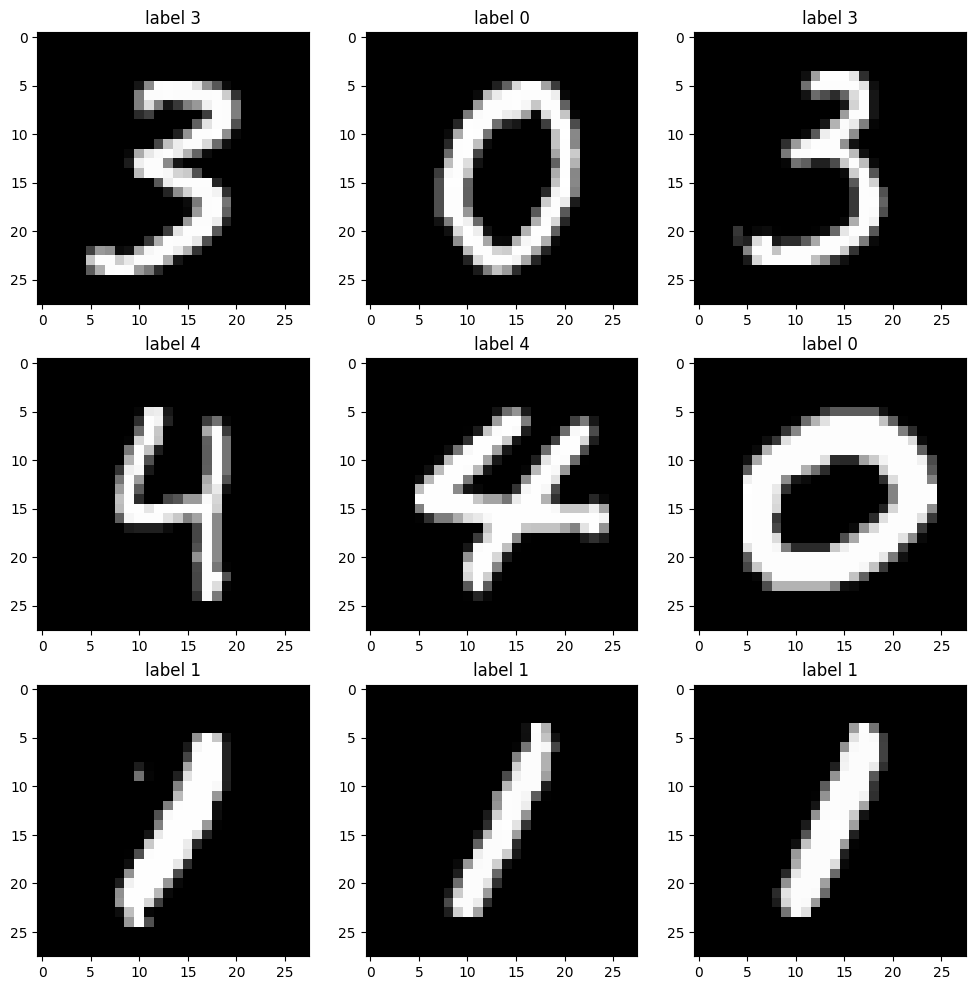

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3,3)
fig.set_size_inches(12,12)
for i in range(3):
  for j in range(3):
    ax[i,j].imshow(images[i*3+j][0], cmap='gray')
    ax[i,j].set_title(f'label {targets[i*3+j]}')
fig.show()

## Section 3: Building the neural network structure

In the instructions, we will build a simple neural network which utilize the following layers:


*   fully connected layers: `nn.Linear(input_dim, output_dim)`
*   convolution layers: `nn.Conv2d(input_channel, output_channel, kernel_size)`
*   Relu function: `F.relu(input_)`
*   max pooling: `F.max_pool2d(input_, kernal_size)`
*   log softmax: `F.log_soft_max(input_)`

More details on this functions are listed here:
[torch.nn.*](https://pytorch.org/docs/stable/nn.html)
[torch.nn.functional.*](https://pytorch.org/docs/stable/nn.functional.html)

Here is how a standard neural network setup:




In [6]:
import torch.nn as nn
import torch.nn.functional as F

class OurNN(nn.Module): # Any neural generated network should be generate

  def __init__(self):
    super(OurNN, self).__init__()

    self.conv = nn.Conv2d(1, 3, kernel_size=5)
    self.fc = nn.Linear(432, 10)

  def forward(self, x):
    x = self.conv(x)        # x now has shape (batchsize x 3 x 24 x 24)
    x = F.relu(F.max_pool2d(x,2))  # x now has shape (batchsize x 3 x 12 x 12)
    x = x.view(-1, 432)      # x now has shape (batchsize x 432)
    x = F.relu(self.fc(x))     # x has shape (batchsize x 10)
    return F.log_softmax(x,-1) 

Note: Always keep track of the dimension of the **x** throughout the neural network. The dimension can easily get mis-mismatched due to the parameter setup for various layers.

We further need to set up an optimizer to help us backprop the network and learn all its parameters. We use the stochastic gradient descent optimizer: `optim.SGD(model, lr, momentum)`

In [7]:
import torch.optim as optim

classifier = OurNN()
optimizer = optim.SGD(classifier.parameters(), lr=0.01, momentum=0.8)

## Section 4: Training/Test our neural network

Generally we need a training function `train()` that completes the following tasks:

1.   init our optimizer
2.   get batches of data
3.   feed forward the data into our network
4.   compute the loss between the output of our network and actual label
5.   move a step on the gradient by optimizer
6.   output some visual information on what we do

Also for the test function `test()`, we have the following tasks:

1.   get batches of data
2.   feed forward the data into our network
3.   compute the loss between the output of our network and actual label
4.   calculate our correctness of the output
5.   save and output some inforamtion on what we do

Here is the code for how we might implement the ideas:



In [8]:
def train(classifier, epoch):

  classifier.train() # we need to set the mode for our model

  for batch_idx, (images, targets) in enumerate(train_loader):

    optimizer.zero_grad()
    output = classifier(images)
    loss = F.nll_loss(output, targets) # Here is a typical loss function (negative log likelihood)
    loss.backward()
    optimizer.step()

    if batch_idx % 10 == 0: # We record our output every 10 batches
      train_losses.append(loss.item()) # item() is to get the value of the tensor directly
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
    if batch_idx % 100 == 0: # We visulize our output every 10 batches
      print(f'Epoch {epoch}: [{batch_idx*len(images)}/{len(train_loader.dataset)}] Loss: {loss.item()}')


def test(classifier, epoch):

  classifier.eval() # we need to set the mode for our model

  test_loss = 0
  correct = 0

  with torch.no_grad():
    for images, targets in test_loader:
      output = classifier(images)
      test_loss += F.nll_loss(output, targets, reduction='sum').item()
      pred = output.data.max(1, keepdim=True)[1] # we get the estimate of our result by look at the largest class value
      correct += pred.eq(targets.data.view_as(pred)).sum() # sum up the corrected samples
  
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  test_counter.append(len(train_loader.dataset)*epoch)

  print(f'Test result on epoch {epoch}: Avg loss is {test_loss}, Accuracy: {100.*correct/len(test_loader.dataset)}%')

In [9]:
train_losses = []
train_counter = []
test_losses = []
test_counter = []
max_epoch = 3

for epoch in range(1, max_epoch+1):
  train(classifier, epoch)
  test(classifier, epoch)


Epoch 1: [0/60000] Loss: 2.349200487136841
Epoch 1: [6400/60000] Loss: 0.3699163794517517
Epoch 1: [12800/60000] Loss: 0.23976194858551025
Epoch 1: [19200/60000] Loss: 0.5024663209915161
Epoch 1: [25600/60000] Loss: 0.5234622955322266
Epoch 1: [32000/60000] Loss: 0.3206535577774048
Epoch 1: [38400/60000] Loss: 0.20371346175670624
Epoch 1: [44800/60000] Loss: 0.16825158894062042
Epoch 1: [51200/60000] Loss: 0.08789227902889252
Epoch 1: [57600/60000] Loss: 0.11130091547966003
Test result on epoch 1: Avg loss is 0.1359765468597412, Accuracy: 96.08999633789062%
Epoch 2: [0/60000] Loss: 0.08058398216962814
Epoch 2: [6400/60000] Loss: 0.21588733792304993
Epoch 2: [12800/60000] Loss: 0.29554447531700134
Epoch 2: [19200/60000] Loss: 0.11795207858085632
Epoch 2: [25600/60000] Loss: 0.08540575206279755
Epoch 2: [32000/60000] Loss: 0.23720212280750275
Epoch 2: [38400/60000] Loss: 0.04408831149339676
Epoch 2: [44800/60000] Loss: 0.32813844084739685
Epoch 2: [51200/60000] Loss: 0.07188573479652405


This simple neural network already achieves an overall accuracy of 87.77%. (Note: random guesses would have an accuracy of 10%)

## Section 5: Visualiaze our result
Here we plot our loss function graph and some of our predictions:  
Loss function plot

Text(0, 0.5, 'negative log likelihood loss')

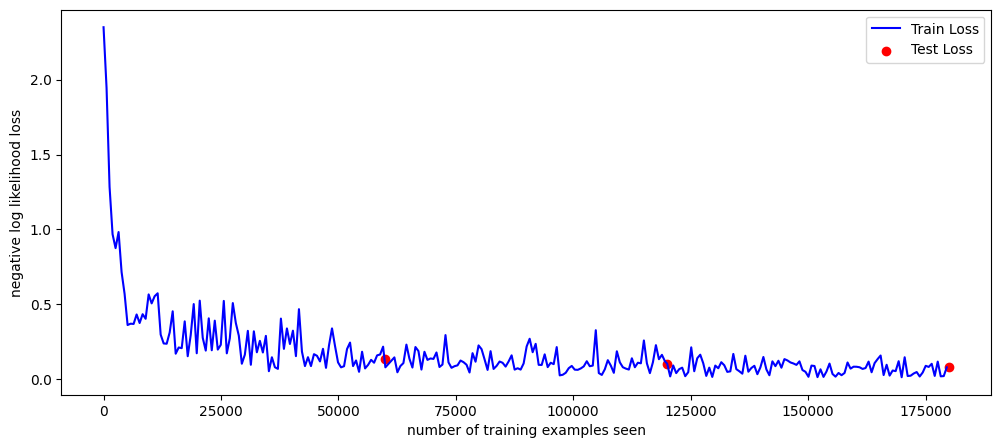

In [10]:
fig = plt.figure(figsize=(12,5))
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')

Judging from our loss graph, our network actually converges at only 1 epoch.  

